**The data scientist wishes to analyze the performance of the dimension reduction methods on the classification of a flower. He has chosen LDA and PCA for dimension reduction. The flower dataset contains petal and sepal features.**

**Dataset URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data**

**He needs to apply a sequence of task as given below:**

**a)	Read the dataset from UCI repository and perform preprocessing. (5 marks)**

In [159]:
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

colnames = [
    "sepal length in cm",
    "sepal width in cm",
    "petal length in cm",
    "petal width in cm",
    "class",
]
data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
    names=colnames,
)

In [160]:
data.isnull().sum()

sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
class                 0
dtype: int64

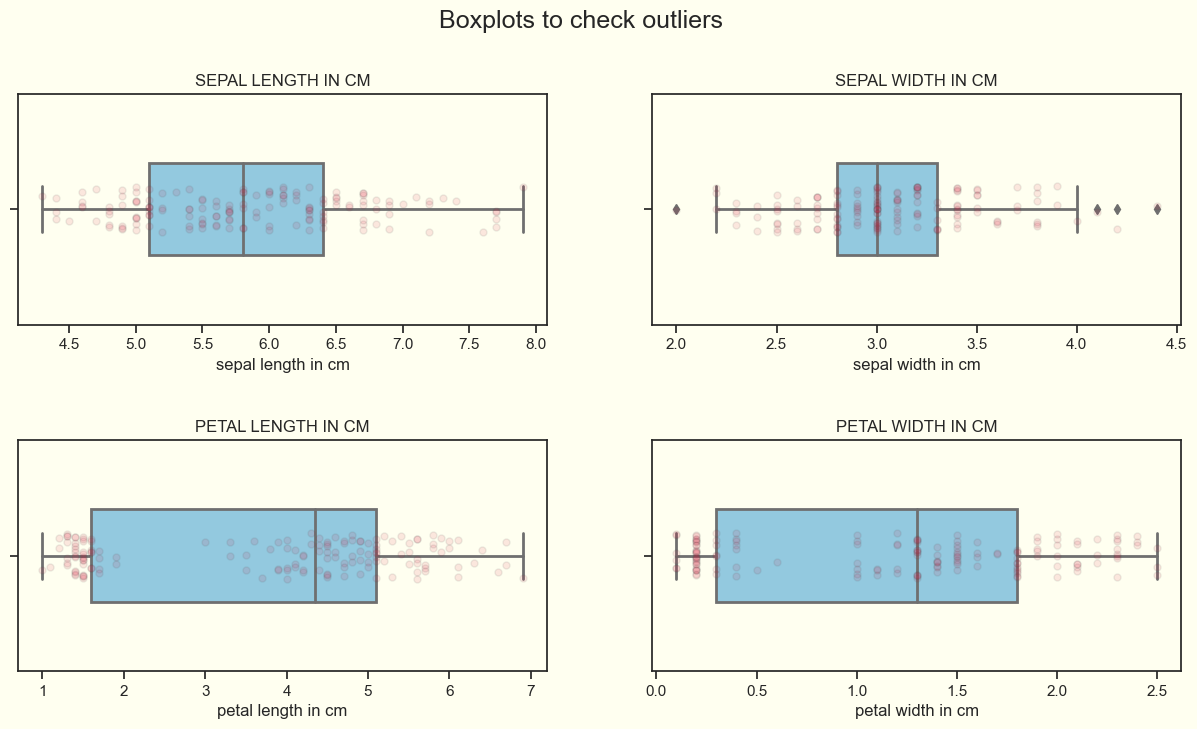

In [161]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Boxplots to check outliers", fontsize=18, y=0.95)

# loop through the length of tickers and keep track of index
for n, ticker in enumerate(data.select_dtypes(np.number)):
    sns.set(
        style="ticks",  # The 'ticks' style
        rc={
            # "figure.figsize": (6, 9),
            "figure.facecolor": "ivory",
            "axes.facecolor": "ivory",
        },
    )
    # add a new subplot iteratively
    try:
        ax = plt.subplot(3, 2, n + 1)

        # filter df and plot ticker on the new subplot axis
        # df[ticker].plot(ax=ax,kind='box')
        sns.boxplot(
            x=ticker,
            data=data,
            width=0.4,
            color="skyblue",
            linewidth=2,
            showfliers=True,
        )
        sns.stripplot(x=ticker, data=data, color="crimson", linewidth=1, alpha=0.1)
        # chart formatting
        ax.set_title(ticker.upper())
    except:
        pass

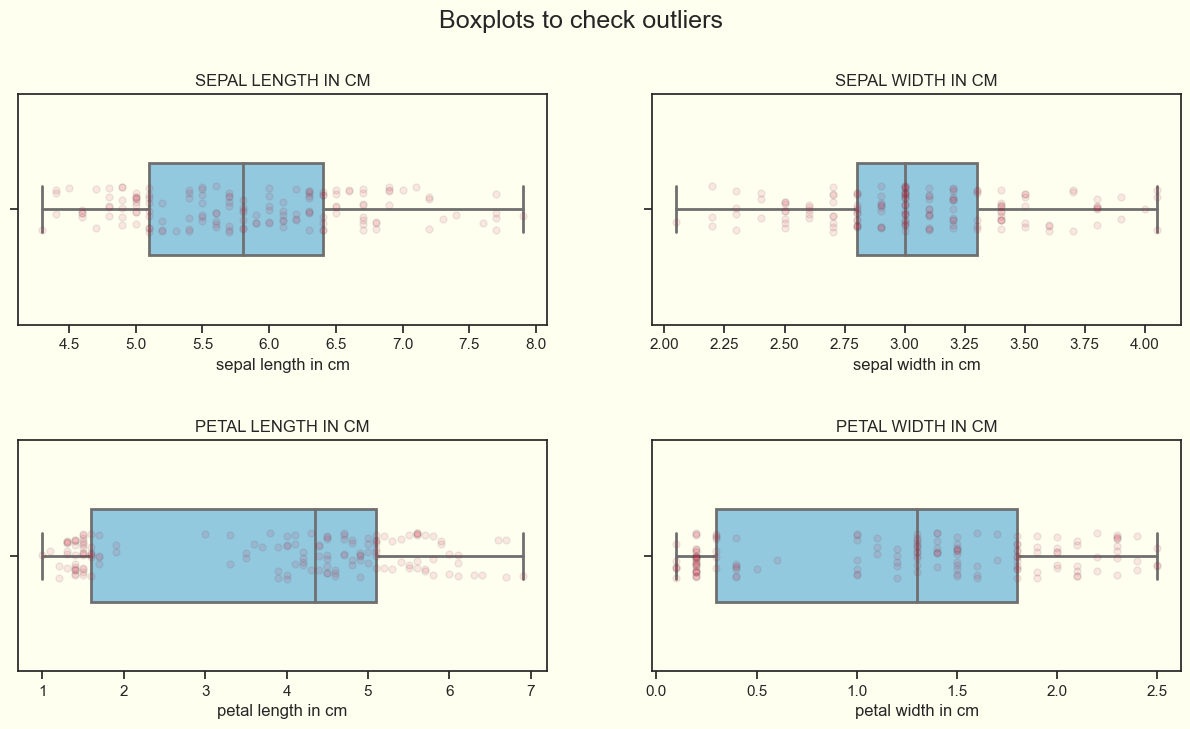

In [162]:
def remove_outliers(df, method="cap", threshold=1.5, exclude=[]):
    # Create a copy of the dataframe to avoid modifying the original data
    df_cleaned = df.copy()

    # Select numerical columns
    if len(exclude) > 0:
        numerical_columns = (
            df.select_dtypes(include=[np.number]).drop(exclude, axis=1).columns
        )

    else:
        numerical_columns = df.select_dtypes(include=[np.number]).columns

    # Iterate over each numerical column in the dataframe
    for column in numerical_columns:
        # Calculate the interquartile range (IQR)
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1

        # Calculate the lower and upper bounds for outliers
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr

        # Apply the specified method to handle outliers
        if method == "cap":
            # Cap the outliers to the upper and lower bounds
            df_cleaned[column] = df[column].clip(lower_bound, upper_bound)
        elif method == "delete":
            # Remove the outliers from the dataframe
            df_cleaned = df_cleaned[
                (df_cleaned[column] >= lower_bound)
                & (df_cleaned[column] <= upper_bound)
            ]

    return df_cleaned
data = remove_outliers(data)
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Boxplots to check outliers", fontsize=18, y=0.95)

# loop through the length of tickers and keep track of index
for n, ticker in enumerate(data.select_dtypes(np.number)):
    sns.set(
        style="ticks",  # The 'ticks' style
        rc={
            # "figure.figsize": (6, 9),
            "figure.facecolor": "ivory",
            "axes.facecolor": "ivory",
        },
    )
    # add a new subplot iteratively
    try:
        ax = plt.subplot(3, 2, n + 1)

        # filter df and plot ticker on the new subplot axis
        # df[ticker].plot(ax=ax,kind='box')
        sns.boxplot(
            x=ticker,
            data=data,
            width=0.4,
            color="skyblue",
            linewidth=2,
            showfliers=True,
        )
        sns.stripplot(x=ticker, data=data, color="crimson", linewidth=1, alpha=0.1)
        # chart formatting
        ax.set_title(ticker.upper())
    except:
        pass

In [163]:
# Create label encoder object
encoder = LabelEncoder()

# Fit and transform the column using the encoder
data["class"] = encoder.fit_transform(data["class"])

# Print the dataframe to see the encoded column
print(data.head())
print(encoder.classes_)
encoder.inverse_transform([0, 1])

   sepal length in cm  sepal width in cm  petal length in cm  \
0                 5.1                3.5                 1.4   
1                 4.9                3.0                 1.4   
2                 4.7                3.2                 1.3   
3                 4.6                3.1                 1.5   
4                 5.0                3.6                 1.4   

   petal width in cm  class  
0                0.2      0  
1                0.2      0  
2                0.2      0  
3                0.2      0  
4                0.2      0  
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


array(['Iris-setosa', 'Iris-versicolor'], dtype=object)

In [164]:
# Assuming you have a pandas DataFrame called 'data' with features and labels
X = data.drop('class', axis=1)  # Features
y = data['class']  # Labels

In [165]:
X = StandardScaler().fit_transform(X)

**b)	Apply PCA on the dataset and classify the data with Random Forest classifier. (15 marks)**

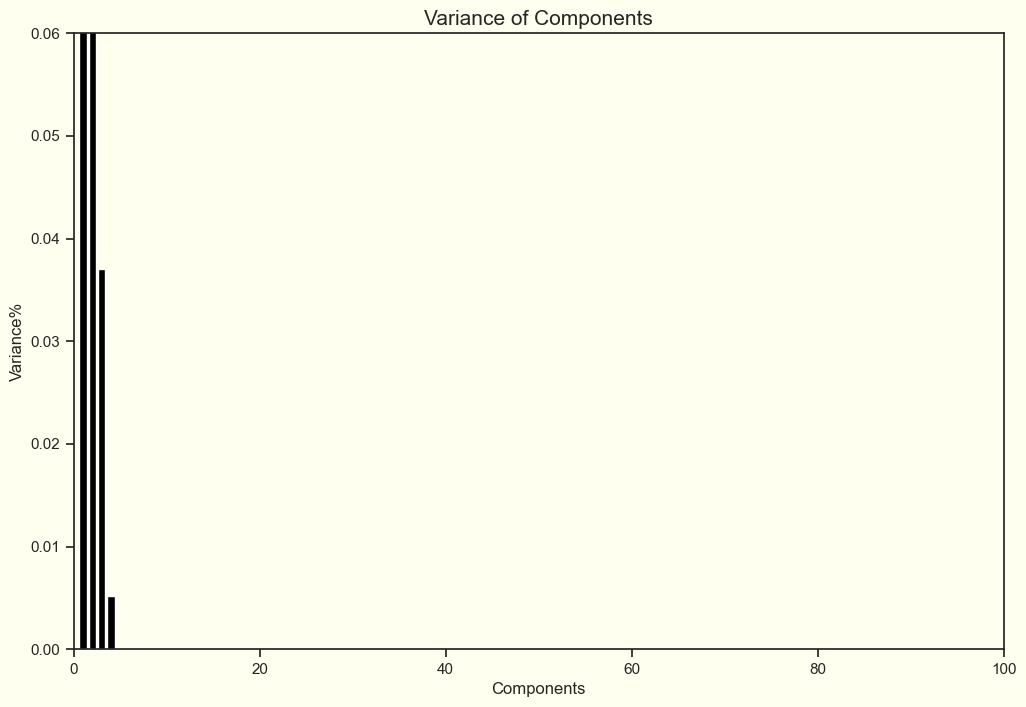

In [166]:
pca=PCA()
pca.fit(X)
plt.figure(figsize=(12,8))
plt.bar(x=list(range(1,5)), height=pca.explained_variance_ratio_,color='black')
plt.xlabel('Components',fontsize=12)
plt.ylim(0,0.06)
plt.xlim(0,100)
plt.ylabel('Variance%',fontsize=12)
plt.title('Variance of Components',fontsize=15)
plt.show()

In [167]:
pca = PCA(n_components=2)  # Choose the number of components you want to keep
X_pca = pca.fit_transform(X)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

rf_classifier_pca = RandomForestClassifier(random_state=42)
rf_classifier_pca.fit(X_train_pca, y_train_pca)

y_pred_pca = rf_classifier_pca.predict(X_test_pca)
accuracy = accuracy_score(y_test_pca, y_pred_pca)
print("Accuracy:", accuracy)
print(classification_report(y_test_pca, y_pred_pca))

Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



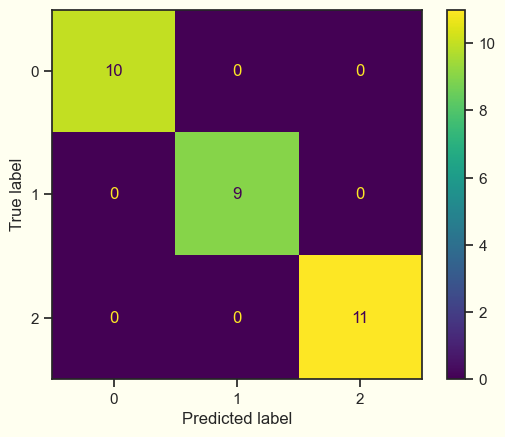

In [168]:
pca_cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
pca_cm.plot()

**c)	Apply LDA on the dataset and classify the data with Random Forest classifier. Compare the result of PCA and LDA. (15 marks)**

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
rf_classifier_lda = RandomForestClassifier(n_estimators=100)
rf_classifier_lda.fit(X_train_lda, y_train)
y_pred = rf_classifier_lda.predict(X_test_lda)

In [170]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [171]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



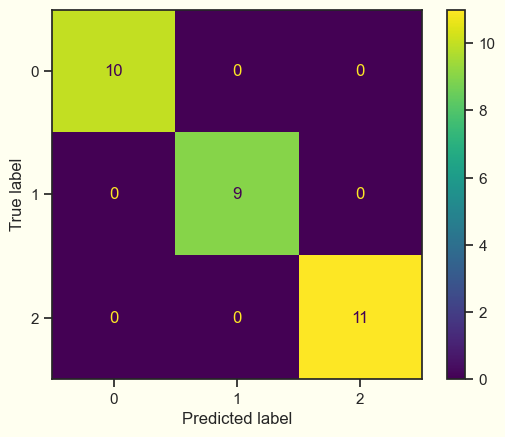

In [172]:
lda_cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
lda_cm.plot()

In [173]:
y_pred_pca = rf_classifier_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
classification_report_pca = classification_report(y_test_pca, y_pred_pca)

In [174]:
y_pred_lda = rf_classifier_lda.predict(X_test_lda)
accuracy_lda = accuracy_score(y_test_lda, y_pred_lda)
classification_report_lda = classification_report(y_test_lda, y_pred_lda)

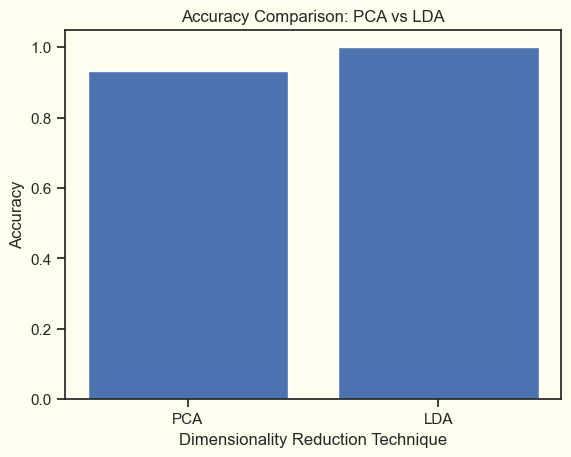

In [175]:
accuracies = [accuracy_pca, accuracy_lda]
labels = ['PCA', 'LDA']

plt.bar(labels, accuracies)
plt.xlabel('Dimensionality Reduction Technique')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: PCA vs LDA')
plt.show()

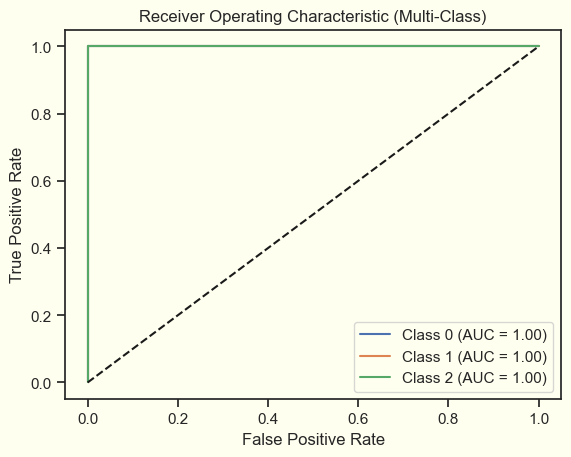

In [176]:
from sklearn.preprocessing import label_binarize
n_classes = len(np.unique(y))  # Number of classes
y_test_bin = label_binarize(y_test_lda, classes=np.unique(y))
y_prob_lda = rf_classifier_lda.predict_proba(X_test_lda)


fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob_lda[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Multi-Class)')
plt.legend(loc='lower right')
plt.show()

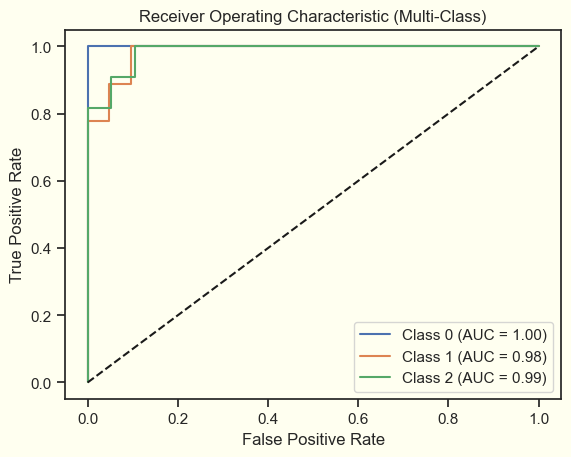

In [177]:
from sklearn.preprocessing import label_binarize
n_classes = len(np.unique(y))  # Number of classes
y_test_bin = label_binarize(y_test_lda, classes=np.unique(y))
y_prob_lda = rf_classifier_pca.predict_proba(X_test_pca)


fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob_lda[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Multi-Class)')
plt.legend(loc='lower right')
plt.show()

--------------The Accuracy of the model----------------------------
The accuracy of the LinearDiscriminantAnalysis is 96.67
The cross validated score for AdaBoostClassifier is: 98.0


Text(0.5, 1.05, 'Confusion_matrix')

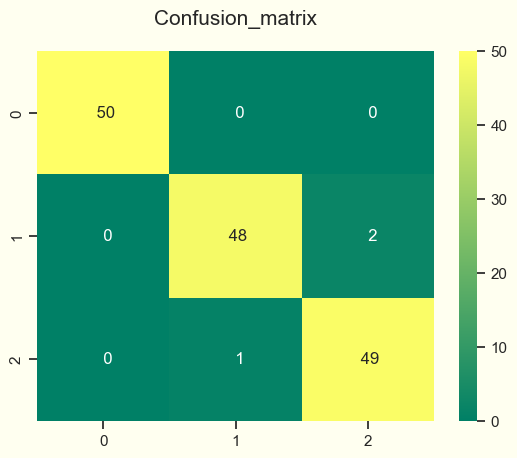

In [182]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model= LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
prediction_lda=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the LinearDiscriminantAnalysis is',round(accuracy_score(prediction_lda,y_test)*100,2))
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
result_lda=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_lda.mean()*100,2))
y_pred = cross_val_predict(model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
test_cluster_labels

In [ ]:
accuracy_score(y_test,test_cluster_labels)

In [ ]:
accuracy_score(y_train,train_cluster_labels)

In [ ]:
RandomForestClassifier()